<a href="https://colab.research.google.com/github/Woongheelee7/Leon/blob/main/Data_Science_Final_1st_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from typing import Tuple
from typing import Union
import os
import seaborn as sns
import statsmodels.formula.api as smf
from tqdm import tqdm
from importlib import reload
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score , cross_val_predict
from sqlalchemy import create_engine
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})
#2010-19 
data_1 = pd.read_csv("https://raw.githubusercontent.com/jj2683/datascience/main/dataset-of-10s.csv")
data_1.head()
#dropping irrelevant columns
df = data_1.drop(['uri','key','mode','chorus_hit','time_signature','sections'], axis=1)
df.head()

,track,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,target
0,Wild Things,Alessia Cara,0.741,0.626,-4.826,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,1
1,Surfboard,Esquivel!,0.447,0.247,-14.661,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,0
2,Love Someone,Lukas Graham,0.550,0.415,-6.557,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.502,0.648,-5.698,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.887,-3.892,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,1


In [ ]:


# # Split first to remove test data
# df_train_st, df_test_st = train_test_split(df, test_size=0.2, random_state=42 ) #, stratify=y)

# # SPlit again between train and val
# #df_train, df_test = train_test_split(df_train_st, test_size=0.25, random_state=42 ) #, stratify=y)
# features = ['danceability',	'energy',	'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence'	,'tempo',	'duration_ms',	'target']
# labels = ['target']


# # Since we're using more than one feature, let's scale our features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(df_train_st[features])
# y_train = df_train_st[labels]

# X_test = scaler.fit_transform(df_test_st[features])
# y_test = df_test_st[labels]
# kf = KFold(n_splits=5,random_state=42,shuffle=True)
# X, y = np.array(X_train), np.array(y_train)

# accuracies = []


# for train_index, test_index in kf.split(X,y):

#     X_train, y_train = X[train_index], y[train_index]    
#     X_val, y_val = X[test_index], y[test_index] 

#     # if needed, do preprocessing here

#     clf = LogisticRegression()
#     clf.fit(X_train,y_train)

#     test_preds = clf.predict(X_test)
#     test_accuracy = accuracy_score(y_test,test_preds)

#     train_preds = clf.predict(X_train)
#     train_accuracy = accuracy_score(y_train, train_preds)

#     print(train_accuracy, test_accuracy, (train_accuracy - test_accuracy) )

#     accuracies.append(accuracies)

# # this is the average accuracy over all folds
# average_accuracy = np.mean(accuracies)

The base LR accuracy is: 0.5026061239
The base LR f1 is: 0.4978056811
The base LR precision is: 0.5081636566
The base LR recall is: 0.4937482711
Precision: 0.4858,   Recall: 0.4842, Accuracy: 0.4851
train error 0.4807986128351335 test error 0.4885900906614065
y pred proba  [0 0 1 ... 1 1 1]
predictions prob [0. 1. 1. ... 0. 1. 1.]
Precision: 0.4820,   Recall: 0.4698, Accuracy: 0.4847
fpr [0.         0.50560399 1.        ] tpr [0.  0.5 1. ]
AUC: 0.4972


0.4978056811

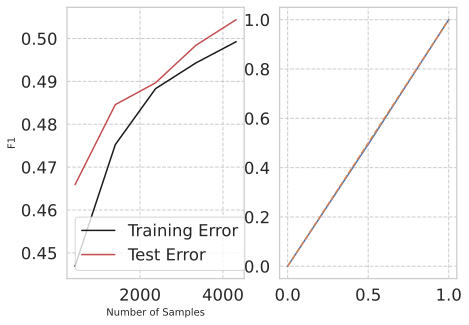

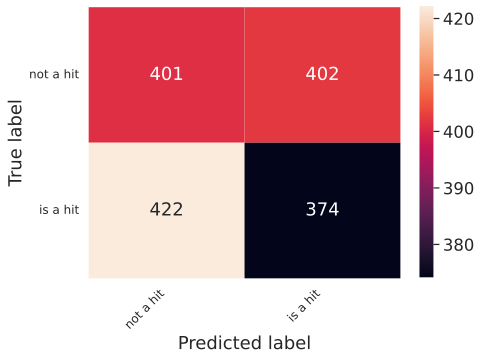

In [ ]:
# Helper function for printing confusion matrices (see: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)
def print_confusion_matrix(confusion_matrix, class_names, figsize = (7,5), fontsize=12):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig
    from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import learning_curve
# #Function used to plot the learning curve, roc curve, and confusing matrix for the given model
# def plot_model(model, X, y):
#     model.fit(X, y)
#     y_predict = model.predict(X)
#     y_predictprob = model.predict_proba(X)[:, 1]

#     LR_acc = np.round(np.mean(cross_val_score(model, X, y, scoring = 'accuracy', cv = 5)), 5)
#     LR_f1 = np.round(np.mean(cross_val_score(model, X, y, scoring = 'f1', cv = 5)), 5)
#     LR_prec = np.round(np.mean(cross_val_score(model, X, y, scoring = 'precision', cv = 5)), 5)
#     LR_recall = np.round(np.mean(cross_val_score(model, X, y, scoring = 'recall', cv = 5)), 5)
#     print(f'The base LR accuracy is: {LR_acc}')
#     print(f'The base LR f1 is: {LR_f1}')
#     print(f'The base LR precision is: {LR_prec}')
#     print(f'The base LR recall is: {LR_recall}')

    
#     m, train_err, test_err = learning_curve(model, X, y, cv = 5, scoring = 'f1', random_state = 42)
#     m_trainerr = np.mean(train_err, axis = 1)
#     m_testerr = np.mean(test_err, axis = 1)

#     print("train error", m_trainerr, "test error", m_testerr)
    
#     fpr, tpr, thr = roc_curve(y, y_predictprob)

#     plt.rcParams.update({'figure.figsize': (7, 5)})
#     plt.subplot(1,2,1)
#     plt.plot(m, m_trainerr, 'k', m, m_testerr, 'r')
#     plt.xlabel('Number of Samples', fontsize = 10)
#     plt.ylabel('F1', fontsize = 10)
#     plt.legend(['Training Error', 'Test Error'])
#     plt.subplot(1,2,2)
#     plt.plot(fpr, tpr)
#     print(f'AUC: {np.round(roc_auc_score(y_train, y_predictprob), 4)}')

#     conf_mat = confusion_matrix(y_train, y_predict)
#     cm = print_confusion_matrix(conf_mat, ['not a hit', 'is a hit'])
    
#     return LR_f1
#Function used to plot the learning curve, roc curve, and confusing matrix for the given model
#Function used to plot the learning curve, roc curve, and confusing matrix for the given model
def plot_model(model, X, y , X2, y2,threshold=0.5):
    model.fit(X, y)
    y_predict = model.predict(X)
    #y_predictprob = model.predict_proba(X)[:, 1]
    
    y_predictprob = (model.predict_proba(X)[:, 1] >=threshold).astype('int')

    LR_acc = np.round(np.mean(cross_val_score(model, X, y, scoring = 'accuracy', cv = 10)), 10)
    LR_f1 = np.round(np.mean(cross_val_score(model, X, y, scoring = 'f1', cv =10)), 10)
    LR_prec = np.round(np.mean(cross_val_score(model, X, y, scoring = 'precision', cv = 10)),10)
    LR_recall = np.round(np.mean(cross_val_score(model, X, y, scoring = 'recall', cv = 10)),10)
    print(f'The base LR accuracy is: {LR_acc}')
    print(f'The base LR f1 is: {LR_f1}')
    print(f'The base LR precision is: {LR_prec}')
    print(f'The base LR recall is: {LR_recall}')

    #print("train : all metrics:", metrics.classification_report(y,y_predictprob))

    print("Precision: {:6.4f},   Recall: {:6.4f}, Accuracy: {:6.4f}".format(precision_score(y, y_predictprob),
                                                        recall_score(y, y_predictprob) ,
                                                        accuracy_score(y,y_predictprob)))
    
    
    m, train_err, test_err = learning_curve(model, X, y, cv = 10, scoring = 'f1', random_state = 42)
    m_trainerr = np.mean(train_err, axis = 1)
    m_testerr = np.mean(test_err, axis = 1)

    print("train error", m_trainerr.mean(), "test error", m_testerr.mean())
    print("y pred proba ",y_predictprob)
    
    
    # try
    
    ns2_probs = [0 for _ in range(len(y2))]
    y2_predict = model.predict(X2)
    y2_predictprobs = model.predict_proba(X2)[:, 1]
    y2_predictprob = (model.predict_proba(X2)[:, 1]>=threshold).astype('int')
    
    print('predictions prob',y2_predictprobs)
    #print("test : all metrics: ", metrics.classification_report(y2,y2_predictprob))    
    print("Precision: {:6.4f},   Recall: {:6.4f}, Accuracy: {:6.4f}".format(precision_score(y2, y2_predictprob),
                                                        recall_score(y2, y2_predictprob) ,
                                                        accuracy_score(y2,y2_predictprob)))
    
    
    
    fpr, tpr, thr = roc_curve(y2, y2_predictprobs)
    print('fpr',fpr,'tpr',tpr)
    ns2_auc = roc_auc_score(y2, ns2_probs)
    ns2_fpr, ns2_tpr, _ = roc_curve(y2, ns2_probs)

#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     print("optimal idx", optimal_idx, "optimal threshold", optimal_threshold)
    
    plt.rcParams.update({'figure.figsize': (7, 5)})
    plt.subplot(1,2,1)
    plt.plot(m, m_trainerr, 'k', m, m_testerr, 'r')
    plt.xlabel('Number of Samples', fontsize = 10)
    plt.ylabel('F1', fontsize = 10)
    plt.legend(['Training Error', 'Test Error'])
    plt.subplot(1,2,2)
    plt.plot(fpr, tpr)
    print(f'AUC: {np.round(roc_auc_score(y2, y2_predictprobs), 4)}')

    pyplot.plot(ns2_fpr, ns2_tpr, linestyle='--', label='No Skill')
    
    conf_mat = confusion_matrix(y2, y2_predictprob)
    cm = print_confusion_matrix(conf_mat, ['not a hit', 'is a hit'])
    
    return LR_f1
def model_dropcols_opt(model, X, y, basef1, ncv, print_f1s = False):
    
    # feature columns that get dropped from X because when dropped
    # they cause f1 to increase or not change at all
    
    cols_drop = []
    counter = 0
    best_delta = ('name', 1)
    while best_delta[1] >= 0:
        
        if counter > len(X.columns) - 2:
            break
        
        deltas = []
        
        for i in X.columns:

            f1_cval = np.round(np.mean(cross_val_score(model, X.drop(columns = i), y, scoring = 'f1', cv = ncv)), 5)
            deltas.append((i, f1_cval - basef1))
        
        deltas_sort = sorted(deltas, key = lambda x: x[0], reverse = True)
        best_delta = deltas_sort[0]
        
        if print_f1s == True:
            print(best_delta)
            
        if best_delta[1] >= 0:
            cols_drop.append(best_delta[0])
            X = X.drop(columns = best_delta[0])
            
    return cols_drop



# Establishing X and y
# y = sbdf['is_hit']
# X = sbdf.drop(columns = ['is_hit','spotifyid','in80','decade','year','duration_ms'])

# # Train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# # Standard scaling of the train and test data
# r_ssX = StandardScaler()
# X_train_scaled = pd.DataFrame(r_ssX.fit_transform(X_train), columns = X_train.columns)
# X_test_scaled = pd.DataFrame(r_ssX.fit_transform(X_test), columns = X_test.columns)
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

# Establishing X and y
y = df['target']
X = df.drop(columns = ['track','artist'])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 10, stratify = y)

r_ssX = StandardScaler()
X_train_scaled = pd.DataFrame(r_ssX.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(r_ssX.fit_transform(X_test), columns = X_test.columns)

X2_train, X2_test,  y2_train,y2_test = train_test_split(X_train_scaled,y_train, test_size = 0.25, random_state = 42)

dc = DummyClassifier(strategy='stratified')
plot_model(dc,X2_train,y2_train,X2_test,y2_test)

The base LR accuracy is: 1.0
The base LR f1 is: 1.0
The base LR precision is: 1.0
The base LR recall is: 1.0
Precision: 1.0000,   Recall: 1.0000, Accuracy: 1.0000
train error 1.0 test error 1.0
y pred proba  [1 1 1 ... 1 0 1]
predictions prob [9.98606904e-01 9.98897035e-01 2.49043719e-04 ... 4.36940556e-04
 9.98529339e-01 1.67402354e-03]
Precision: 1.0000,   Recall: 1.0000, Accuracy: 1.0000
fpr [0.         0.         0.         0.         0.         0.15442092
 0.15691158 0.18804483 0.19053549 0.26027397 0.26400996 0.39601494
 0.3985056  0.79576588 0.79825654 0.80199253 0.80572852 0.81942715
 0.82191781 0.85305106 0.85554172 1.        ] tpr [0.         0.00125628 0.21859296 0.22110553 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
AUC: 1.0


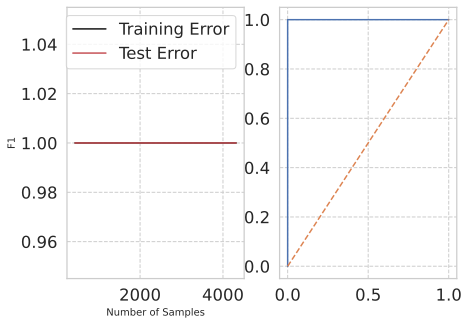

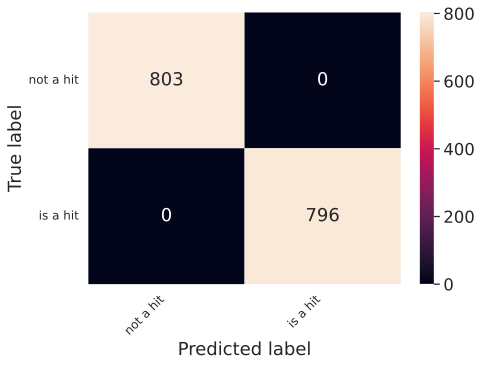

In [ ]:

lr = LogisticRegression(random_state=42)
rlr_basef1 = plot_model(lr, X2_train, y2_train,X2_test,y2_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

lrparam_grid = {'C': np.arange(0.10, 1, 0.01)}

lr_grid = GridSearchCV(lr, lrparam_grid, scoring = 'f1', cv = 5)
lr_grid.fit(X2_train, y2_train)
print(lr_grid.best_params_)
print(lr_grid.best_score_)

{'C': 0.1}
1.0


The base LR accuracy is: 1.0
The base LR f1 is: 1.0
The base LR precision is: 1.0
The base LR recall is: 1.0
Precision: 1.0000,   Recall: 1.0000, Accuracy: 1.0000
train error 1.0 test error 1.0
y pred proba  [1 1 1 ... 1 0 1]
predictions prob [9.98570526e-01 9.98867434e-01 2.56337308e-04 ... 4.49356379e-04
 9.98489901e-01 1.71937099e-03]
Precision: 1.0000,   Recall: 1.0000, Accuracy: 1.0000
fpr [0.         0.         0.         0.         0.         0.15442092
 0.15691158 0.18804483 0.19053549 0.25902864 0.26276463 0.39601494
 0.3985056  0.79576588 0.79825654 0.80199253 0.80572852 0.81942715
 0.82191781 0.85305106 0.85554172 1.        ] tpr [0.         0.00125628 0.21859296 0.22110553 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
AUC: 1.0


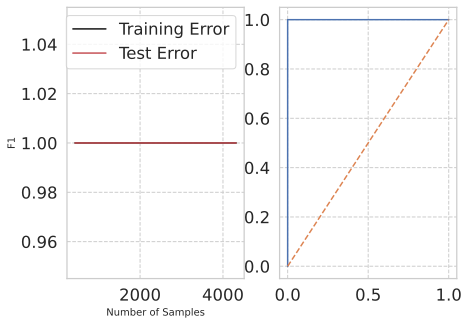

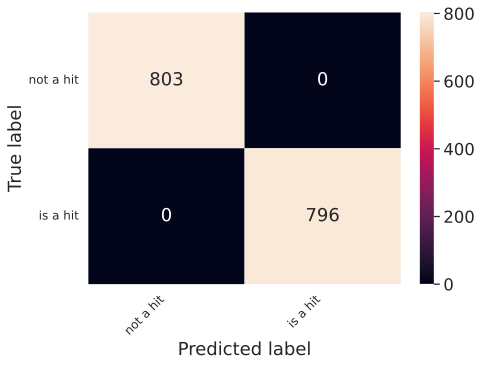

In [ ]:
lr = LogisticRegression(C = 0.97, random_state = 40)
rlr_optf1 = plot_model(lr, X2_train, y2_train, X2_test, y2_test)

In [ ]:
lr = LogisticRegression(C = 0.97, random_state = 40)
lr.fit(X2_train, y2_train)

lrimportances = sorted([(i, j) for i, j in zip(X2_train.columns, lr.coef_[0])],
       key = lambda x: abs(x[1]), reverse = True)

print(lrimportances)
lr_drops = [i[0] for i in lrimportances if abs(i[1]) < 0.10]
lr_drops

[('target', 6.2902723570469155), ('instrumentalness', -0.6265829163677155), ('loudness', 0.3962350550181192), ('danceability', 0.2883122147075049), ('energy', -0.2727582452677752), ('duration_ms', -0.13550839775126258), ('acousticness', -0.1143012122786641), ('liveness', -0.04426897409122516), ('tempo', 0.030901045437890087), ('valence', -0.02565366036364348), ('speechiness', 0.00422782506975784)]


['liveness', 'tempo', 'valence', 'speechiness']

The base LR accuracy is: 1.0
The base LR f1 is: 1.0
The base LR precision is: 1.0
The base LR recall is: 1.0
Precision: 1.0000,   Recall: 1.0000, Accuracy: 1.0000
train error 1.0 test error 1.0
y pred proba  [1 1 1 ... 1 0 1]
predictions prob [9.98668326e-01 9.98911659e-01 2.56471599e-04 ... 4.54017240e-04
 9.98357790e-01 1.72221257e-03]
Precision: 1.0000,   Recall: 1.0000, Accuracy: 1.0000
fpr [0.         0.         0.         0.         0.         0.16438356
 0.16687422 0.20547945 0.20797011 0.27272727 0.27646326 0.42590286
 0.42839352 0.80199253 0.80448319 0.8132005  0.81693649 0.82191781
 0.82440847 0.86425903 0.86674969 1.        ] tpr [0.         0.00125628 0.23366834 0.2361809  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
AUC: 1.0


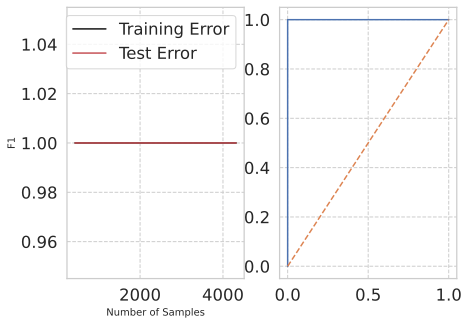

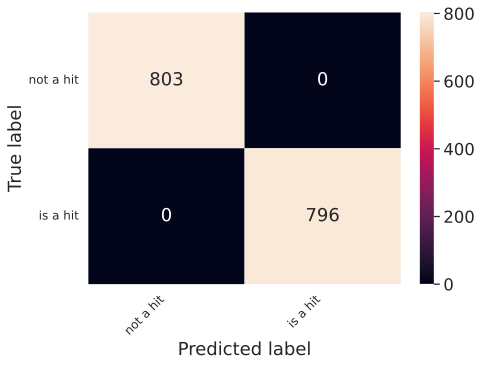

In [ ]:
X3_train = X2_train.drop(lr_drops, axis = 1)
X3_test = X2_test.drop(lr_drops, axis = 1)

lr = LogisticRegression(C = 0.97, random_state = 42)

rlr_thirdf1 = plot_model(lr, X3_train, y2_train, X3_test, y2_test)

In [ ]:

lr_colsdrop = model_dropcols_opt(lr, X2_train, y2_train, rlr_basef1, 5, True)

('valence', 0.0)
('tempo', 0.0)
('target', -0.17862999999999996)


In [ ]:
lr_Xtrain_scaled = X_train_scaled.drop(lr_colsdrop, axis = 1)
lr_Xtrain_scaled.columns
#rlr_secondf1 = plot_model(lr, lr_Xtrain_scaled, y_train)

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'duration_ms', 'target'],
      dtype='object')

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

# Split first to remove test data
df_train_st, df_test_st = train_test_split(df, test_size=0.2, random_state=42 ) #, stratify=y)

# SPlit again between train and val
df_train, df_test = train_test_split(df_train_st, test_size=0.25, random_state=42 ) #, stratify=y)

In [ ]:
features1 = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'duration_ms']
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'duration_ms']

# Since we're using more than one feature, let's scale our features
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train[features])
y_train = df_train['target']

X_test = scaler.fit_transform(df_test[features])
y_test = df_test['target']

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
#skfold = StratifiedKFold(n_splits=5, random_state=42)
skfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_skfold = LogisticRegression()

# accuracy
results_skfold = cross_val_score(model_skfold, X_train, y_train, cv=skfold)
predict_skfold = cross_val_predict(model_skfold, X_train, y_train, cv=skfold)


print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
print(metrics.classification_report(y_train,predict_skfold))
predict_skfold_val = cross_val_predict(model_skfold, X_test, y_test, cv=skfold)
print(metrics.classification_report(y_test,predict_skfold_val))
results_fit = model_skfold.fit(X_train,y_train)
confusion_matrix(df_test['target'], predict_skfold_val)


Accuracy: 80.56%
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      1913
           1       0.76      0.90      0.82      1925

    accuracy                           0.81      3838
   macro avg       0.82      0.81      0.80      3838
weighted avg       0.82      0.81      0.80      3838

              precision    recall  f1-score   support

           0       0.88      0.68      0.77       631
           1       0.75      0.91      0.82       649

    accuracy                           0.80      1280
   macro avg       0.82      0.80      0.80      1280
weighted avg       0.81      0.80      0.80      1280



array([[432, 199],
       [ 57, 592]])

[[432 199]
 [ 57 592]]


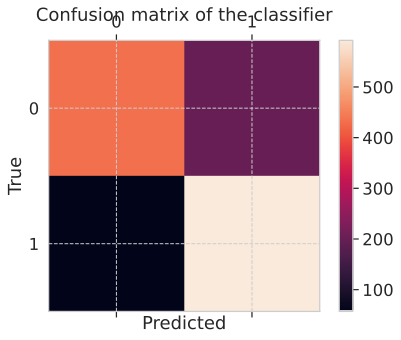

In [ ]:
from sklearn.metrics import confusion_matrix

labels = [0,1]
cm = confusion_matrix(df_test['target'],predict_skfold_val)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confmx_lr.png')
plt.show()


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.861


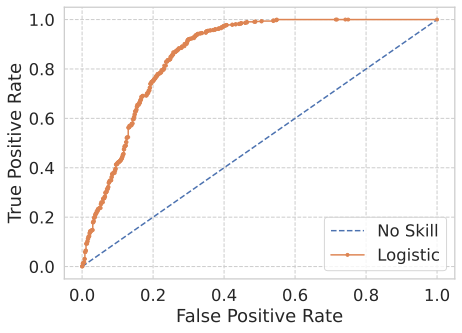

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = results_fit.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

# Split first to remove test data
df_train_st, df_test_st = train_test_split(df, test_size=0.2, random_state=42 ) #, stratify=y)

# SPlit again between train and val
df_train, df_test = train_test_split(df_train_st, test_size=0.2, random_state=42 ) #, stratify=y)
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'duration_ms']

# Since we're using more than one feature, let's scale our features
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train[features])
y_train = df_train['target']

X_test = scaler.fit_transform(df_test[features])
y_test = df_test['target']
# from sklearn.preprocessing import StandardScaler
# features = ['energy','mode','acousticness','danceability','energy','loudness','key','instrumentalness']

# # Since we're using more than one feature, let's scale our features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(df_train[features])
# y_train = df_train['in80']
print(X_train)

[[ 1.08705682 -0.69996744 -0.86939965 ... -0.17502789  3.19883389
  -0.19792268]
 [-0.74686621 -1.01066932 -0.73814348 ... -0.5171361  -0.35527537
   0.72798804]
 [ 1.16633303  0.3497011   0.73950334 ... -0.51717348 -0.20364955
  -0.01577631]
 ...
 [-0.17607749 -1.73703995 -0.55914022 ... -0.51705025 -0.64700346
  -0.20392307]
 [ 0.45813221 -0.18772919  0.12014431 ... -0.50770112 -0.3977306
  -0.18369249]
 [-0.16022225  0.79476055  0.34631474 ... -0.51717348  2.62265577
  -0.33310944]]


In [ ]:
lm_3 = LogisticRegression()  # We'll also regularize our features
lm_3.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_test = scaler.transform(df_test[features])
y_test = df_test['target']

preds = lm_3.predict(X_test)
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

confusion_matrix(y_test, preds)

array([[354, 151],
       [ 41, 478]])

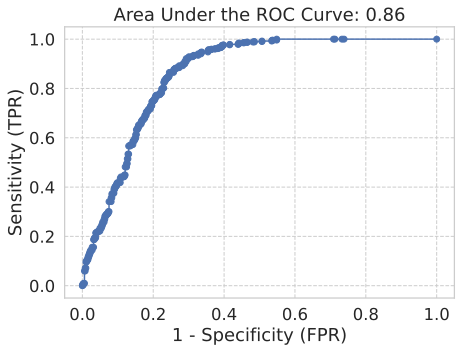

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lm_3.predict_proba(X_test)[:,1])
def plot_roc(true, probas):
    auc = roc_auc_score(true, probas)

    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('1 - Specificity (FPR)')
    plt.ylabel('Sensitivity (TPR)');
    plt.title(f"Area Under the ROC Curve: {round(auc, 3)}");
plot_roc(df_test['target'], lm_3.predict_proba(X_test)[:, 1])

In [ ]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

# using the default threshold of 0.5, which is what vanilla predict does
y_predict = lm_3.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.7599,   Recall: 0.9210


In [ ]:
# using the new threshold of 0.06
y_predict = (lm_3.predict_proba(X_test)[:,1] > 0.5)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.7599,   Recall: 0.9210


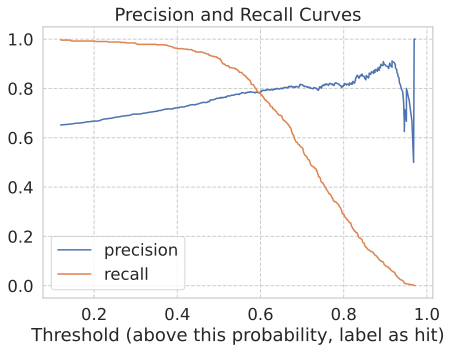

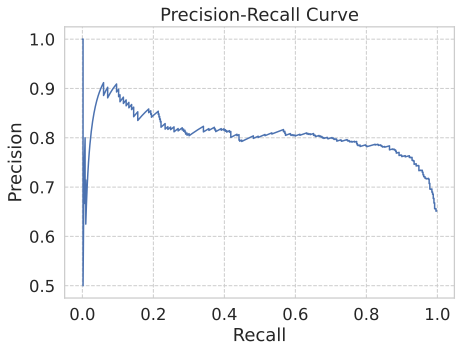

In [ ]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm_3.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as hit)');
plt.title('Precision and Recall Curves');
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [ ]:
# Or we can just ask sklearn
y_predict = lm_3.predict(X_test)
f1_score(y_test, y_predict)
# What about the threshold of 0.06?
y_predict = (lm_3.predict_proba(X_test)[:, 1] > 0.50)
f1_score(y_test, y_predict)

0.832752613240418

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)
#accuracy_score(y_test, y_predict, normalize=False)

0.8125

ROC AUC score =  0.8601575764512868


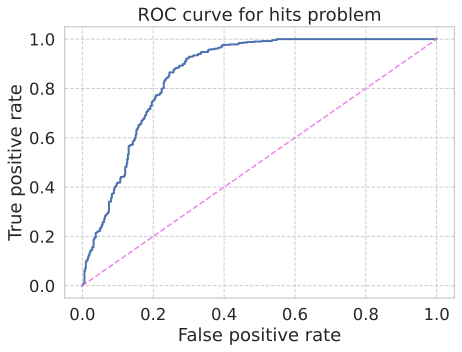

In [ ]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lm_3.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for hits problem');
print("ROC AUC score = ", roc_auc_score(y_test, lm_3.predict_proba(X_test)[:,1]))